<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение-и-предсказание-модели" data-toc-modified-id="Обучение-и-предсказание-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение и предсказание модели</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Умножение матриц</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчет-формул-и-анализ" data-toc-modified-id="Расчет-формул-и-анализ-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчет формул и анализ</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Алгоритм преобразования</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
# for google colab:
from google.colab import drive
drive.mount('/content/gdrive')

df = pd.read_csv('/content/gdrive/MyDrive/colab_notebooks/10-insurance-data-protection/data/insurance.csv')


In [ ]:
df.head(5)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Пол                  5000 non-null int64
Возраст              5000 non-null float64
Зарплата             5000 non-null float64
Члены семьи          5000 non-null int64
Страховые выплаты    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [ ]:
columns = df.columns
columns_new = []
for name in columns:
  columns_new.append(re.sub(r'(?<!^)(?=[A-Z])', '_', name).lower().replace(" ", "_"))
columns_new

['пол', 'возраст', 'зарплата', 'члены_семьи', 'страховые_выплаты']

In [ ]:
df.set_axis(columns_new, axis='columns', inplace=True)

In [ ]:
df.duplicated().sum()

153

In [ ]:
df = df.drop_duplicates()

In [ ]:
df['страховые_выплаты'].value_counts()

0    4284
1     423
2     114
3      18
4       7
5       1
Name: страховые_выплаты, dtype: int64

In [ ]:
df['пол'].value_counts()

0    2431
1    2416
Name: пол, dtype: int64

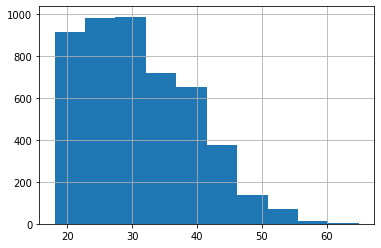

In [ ]:
df['возраст'].hist()

In [ ]:
df['члены_семьи'].value_counts()

1    1748
0    1461
2    1038
3     437
4     124
5      32
6       7
Name: члены_семьи, dtype: int64

### Вывод

Наименования столбцов преобразованы к стилю питона, пропуски не найдены, ошибки в данных не найдены, дубликаты удалены

## Обучение и предсказание модели

In [ ]:
RANDOM = 12345

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['страховые_выплаты'], axis=True),
                                                    df['страховые_выплаты'],
                                                    test_size=0.33, random_state=RANDOM)

In [ ]:
model = LinearRegression().fit(X_train, y_train)

In [ ]:
r2_simple_features = r2_score(y_test, model.predict(X_test))

In [ ]:
r2_simple_features

0.4346014673692796

### Вывод

Модель обучена, значение R2 0,435

## Умножение матриц

Проверка изменится ли значение R2 модели если признаки умножить на обратимую матрицу

In [ ]:
matrix = np.random.normal(0, 1, size=(X_train.shape[1], X_train.shape[1]))

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
исправлено
</div>

In [ ]:
matrix

array([[ 1.16595126,  1.11517368, -0.46370469,  1.39439024],
       [-0.29659102,  0.44886579, -0.74515906, -0.83000794],
       [ 1.73139634,  0.70611843,  1.27900795,  1.14145051],
       [ 1.06187948, -0.90415992,  0.82198751, -0.26141824]])

In [ ]:
X_train.head(3)

,пол,возраст,зарплата,члены_семьи
172,1,22.0,44700.0,2
1573,0,27.0,36600.0,2
4188,0,32.0,41900.0,2


Умножение тренировочных и тестовых данных на обратную матрицу

In [ ]:
X_train = X_train @ np.linalg.inv(matrix)

In [ ]:
X_train.head(3)

,0,1,2,3
172,-32208.824312,-5100.536468,31608.987560,-17596.666719
1573,-26374.991214,-4171.147462,25887.101077,-14414.067616
4188,-30194.720374,-4774.201537,29636.579344,-16501.946115


In [ ]:
(X_train @ matrix).head(3)

,0,1,2,3
172,1.000000e+00,22.0,44700.0,2.0
1573,-5.984020e-12,27.0,36600.0,2.0
4188,-8.874747e-12,32.0,41900.0,2.0


In [ ]:
X_test = X_test @ np.linalg.inv(matrix)

Обучение и проверка значения R2

In [ ]:
model = LinearRegression().fit(X_train, y_train)

In [ ]:
r2_matrix_features = r2_score(y_test, model.predict(X_test))

In [ ]:
r2_matrix_features

0.43460146736922534

In [ ]:
(r2_matrix_features - r2_simple_features).round(5)

-0.0

Значение метрики R2 не изменилось после умножения признаков на обратную матрицу

Проверка умножения на нулевую матрицу

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['страховые_выплаты'], axis=True),
                                                    df['страховые_выплаты'],
                                                    test_size=0.33, random_state=RANDOM)

In [ ]:
matrix_zeros = np.array([[0, 0, 0, 0],
                         [0, 0, 0, 0],
                         [0, 0, 0, 0],
                         [0, 0, 0, 0]])

In [ ]:
try:
  X_train = X_train @ np.linalg.inv(matrix_zeros)
except:
  print('ошибка умножения')

ошибка умножения


Умножение на единичную матрицу

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['страховые_выплаты'], axis=True),
                                                    df['страховые_выплаты'],
                                                    test_size=0.33, random_state=RANDOM)

In [ ]:
X_train.head(3)

,пол,возраст,зарплата,члены_семьи
172,1,22.0,44700.0,2
1573,0,27.0,36600.0,2
4188,0,32.0,41900.0,2


In [ ]:
matrix_E = np.array([[1, 0, 0, 0],
                     [0, 1, 0, 0],
                     [0, 0, 1, 0],
                     [0, 0, 0, 1]])

In [ ]:
X_train.head(3)

,пол,возраст,зарплата,члены_семьи
172,1,22.0,44700.0,2
1573,0,27.0,36600.0,2
4188,0,32.0,41900.0,2


In [ ]:
X_train = X_train @ np.linalg.inv(matrix_E)

In [ ]:
X_train.head(3)

,0,1,2,3
172,1.0,22.0,44700.0,2.0
1573,0.0,27.0,36600.0,2.0
4188,0.0,32.0,41900.0,2.0


### Вывод

После проведенных исследований получена следующая информация:
- при умножении признаков на обратную случайную матрицу с нормальным распределением, показатели метрики R2 не меняются, по сравнению с показателями метрики у модели на непреобразованных данных
  - если полученные признаки умножить на матрицу (и округлить до целых), то в результате получатся изначальные значения признаков
- при попытке умножения на нулевую матрицу - ошибка
- при умножении на единичную матрицу - данные не меняются

## Расчет формул и анализ

Формулы линейной регрессии

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Формулы линейной регрессии с умножением на обратную матрицу**

Обозначения:

- $A$ — произвольная, не нулевая, не единичная, квадратная матрица с шириной (и длиной) равной ширине матрицы признаков

- $E$ — единичная матрица с длиной равной ширине матрицы признаков

$$
w_1 = ((A^{-1})^T X^T X A^{-1})^{-1} (X A^{-1})^T y
$$

$$
w_1 = ((A^{-1})^T X^T X A^{-1})^{-1} (A^{-1})^T X^T y
$$

$$
w_1 = ((A^{-1})^T (X^T X A^{-1}))^{-1} (A^{-1})^T X^T y
$$

$$
w_1 = (X^T X A^{-1})^{-1} ((A^{-1})^T)^{-1} (A^{-1})^T X^T y
$$

$$
w_1 = (X^T X A^{-1})^{-1} E X^T y
$$

$$
w_1 = (X^T X A^{-1})^{-1} X^T y
$$

$$
w_1 = ((X^T X) A^{-1})^{-1} X^T y
$$

$$
w_1 = (A^{-1})^{-1}(X^T X)^{-1} X^T y
$$

$$
w_1 = A(X^T X)^{-1} X^T y
$$

$$
w_1 = Aw
$$

$$
a_1 = X A^{-1}w_1 = ...
$$

$$
a_1 = X A^{-1} Aw
$$

$$
a_1 = XEw
$$

$$
a_1 = Xw
$$

$$
a_1 = a
$$

### Вывод

- В результате умножения матрицы признаков X на обратную матрицу A и упрощения формулы, вектор весов линейной регрессии будет иметь такую же формулу, но умноженную на матрицу. В процессе сокращения образуется единичная матрица E (при умножении матрицы на обратную матрицу), а так как при умножении на единичную матрицу признаки не меняются, то ее можно отбросить. Итоговая формула имеет вид:
$$
w_1 = A(X^T X)^{-1} X^T y = Aw
$$
- Так как в формуле предсказания произведение вектора весов на матрицу признаков, то после сокращения формула будет иметь изначальный вид. В процессе сокращения также образуется единичная матрица и отбрасывается.
$$
a_1 = Xw = a
$$
- При этом должны соблюдаться условия: случайная матрица не должна быть нулевой или единичной

## Алгоритм преобразования

Функция умножения признаков на обратную матрицу

In [ ]:
def df_multiplication_matrix (df_target_dropped):
  matrix_len = df_target_dropped.shape[1]
  matrix = np.random.normal(0, 1, size=(matrix_len, matrix_len))
  return df_target_dropped @ np.linalg.inv(matrix), matrix

Функция умножения признаков на матрицу

In [ ]:
def df_multiplication_matrix_back (df_multiplicated, matrix):
  return df_multiplicated @ matrix

Проверка значений в исходном и преобразованных df

In [ ]:
df.drop(['страховые_выплаты'], axis=1).head()

,пол,возраст,зарплата,члены_семьи
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0


In [ ]:
df_multiplicated, matrix = df_multiplication_matrix(df.drop(['страховые_выплаты'], axis=True))

In [ ]:
df_multiplicated.head()

,0,1,2,3
0,-9909.267857,-5016.797573,39867.369092,14447.659698
1,-7596.079898,-3855.909159,30538.929116,11068.255928
2,-4198.423594,-2134.508151,16874.234638,6116.736022
3,-8328.336683,-4204.176570,33527.399572,12146.016464
4,-5215.612343,-2646.398673,20973.772150,7602.769125


In [ ]:
df_multiplicated = df_multiplication_matrix_back(df_multiplicated, matrix)

In [ ]:
df_multiplicated[[0, 3]] = df_multiplicated[[0, 3]].round().astype(int)

In [ ]:
df_multiplicated.head()

,0,1,2,3
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0


Сверка сумм

In [ ]:
df.drop(['страховые_выплаты'], axis=1).sum()

пол                 2416.0
возраст           150373.0
зарплата       193375000.0
члены_семьи         5833.0
dtype: float64

In [ ]:
df_multiplicated.sum()

0         2416.0
1       150373.0
2    193375000.0
3         5833.0
dtype: float64

### Вывод

Созданы функции для преобразования (умножения на обратную матрицу) признаков дата фрейма и обратного преобразования (умножения на матрицу). Сумма по всем столбца до преобразования и после одинакова

## Общий вывод

- В загруженных данных наименования столбцов преобразованы к стилю питона, пропуски не найдены, ошибки в данных не найдены, дубликаты удалены
- После проведенных исследований получена следующая информация:
  - при умножении признаков на обратную случайную матрицу с нормальным распределением, показатели метрики R2 не меняются, по сравнению с показателями метрики у модели на непреобразованных данных
    - если полученные признаки умножить на матрицу (и округлить до целых), то в результате получатся изначальные значения признаков
  - при попытке умножения на нулевую матрицу - ошибка
  - при умножении на единичную матрицу - данные не меняются
- Приведены формулы, из которых видно, что, если умножить матрицу признаков на случайную квадратную матрицу такой же ширины, то формула предсказания модели не изменится. Случайная матрица не должна быть нулевой или единичной
- Созданы функции для преобразования (умножения на обратную матрицу) признаков дата фрейма и обратного преобразования (умножения на матрицу). Сумма по всем столбца до преобразования и после одинакова